In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [4]:
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(int)

# Normalize
X = X / 255.0

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 0.9200714285714285


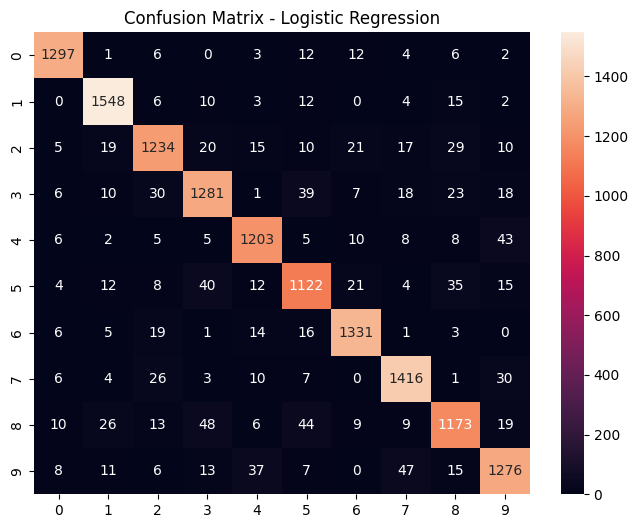

In [6]:
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8,6))
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("../outputs/confusion_matrix_logistic.png")
plt.show()

In [7]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    max_iter=20,
    random_state=42
)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Neural Network Accuracy:", mlp_accuracy)

MLP Neural Network Accuracy: 0.9724285714285714


c:\Users\Admin\Desktop\Ayush_Singh\aiml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


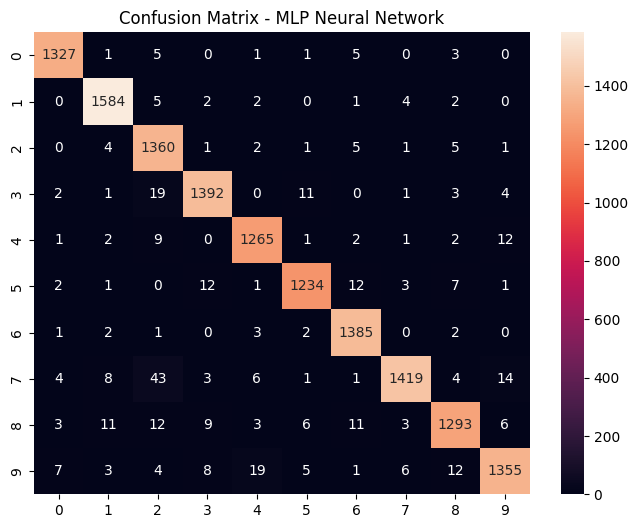

In [8]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d')
plt.title("Confusion Matrix - MLP Neural Network")
plt.savefig("../outputs/confusion_matrix_mlp.png")
plt.show()

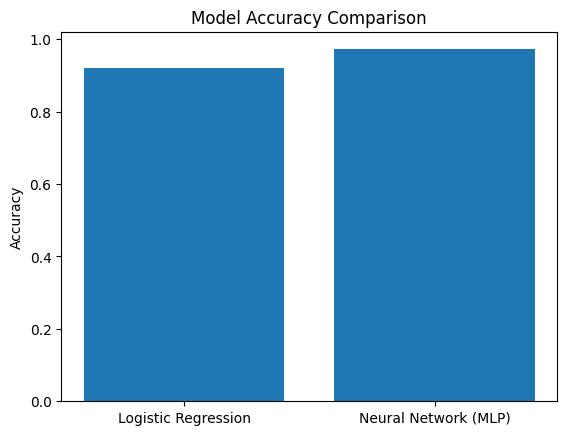

In [9]:
models = ['Logistic Regression', 'Neural Network (MLP)']
accuracies = [log_accuracy, mlp_accuracy]

plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.savefig("../outputs/accuracy_graph.png")
plt.show()

In [10]:
joblib.dump(log_model, "../models/logistic_model.pkl")
joblib.dump(mlp_model, "../models/mlp_model.pkl")

['../models/mlp_model.pkl']